In [100]:
import pandas as pd
import numpy as np
import ast
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# from functions_josh import *

In [2]:
# Load dataframe
df = pd.read_csv('shows_imdb_rt.csv', index_col=0)

In [3]:
# Take a peek
df.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,rt_audience_rating,genres,tv_rating,release_year,runtime_mins,imdb_url
0,La Casa de Papel,Netflix,8.5,215007,91.0,82.0,"['action', 'crime', 'mystery', 'thriller']",TV-MA,2017.0,70.0,https://www.imdb.com/title/tt6468322/
1,Ozark,Netflix,8.4,136710,81.0,91.0,"['crime', 'drama', 'thriller']",TV-MA,2017.0,60.0,https://www.imdb.com/title/tt5071412/
2,Tiger King,Netflix,7.8,33700,86.0,86.0,"['documentary', 'crime']",TV-MA,2020.0,31.0,https://www.imdb.com/title/tt11823076/
3,Westworld,HBO,8.7,388252,85.0,80.0,"['drama', 'mystery', 'sci-fi', 'western']",TV-MA,2016.0,62.0,https://www.imdb.com/title/tt0475784/
4,The Walking Dead,AMC,8.2,821809,81.0,78.0,"['drama', 'horror', 'thriller']",TV-MA,2010.0,44.0,https://www.imdb.com/title/tt1520211/


In [4]:
# Check for datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               247 non-null    object 
 1   network             247 non-null    object 
 2   imdb_rating         247 non-null    float64
 3   num_imdb_ratings    247 non-null    int64  
 4   rt_critic_rating    247 non-null    float64
 5   rt_audience_rating  194 non-null    float64
 6   genres              247 non-null    object 
 7   tv_rating           247 non-null    object 
 8   release_year        247 non-null    float64
 9   runtime_mins        247 non-null    float64
 10  imdb_url            247 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 23.2+ KB


In [5]:
# Drop column with null values, knowing we can grab it later if necessary
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             247 non-null    object 
 1   network           247 non-null    object 
 2   imdb_rating       247 non-null    float64
 3   num_imdb_ratings  247 non-null    int64  
 4   rt_critic_rating  247 non-null    float64
 5   genres            247 non-null    object 
 6   tv_rating         247 non-null    object 
 7   release_year      247 non-null    float64
 8   runtime_mins      247 non-null    float64
 9   imdb_url          247 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 21.2+ KB


In [6]:
# Change dtypes for columns without null values
df[['rt_critic_rating', 'release_year', 'runtime_mins']] = df[['rt_critic_rating', 'release_year', 'runtime_mins']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             247 non-null    object 
 1   network           247 non-null    object 
 2   imdb_rating       247 non-null    float64
 3   num_imdb_ratings  247 non-null    int64  
 4   rt_critic_rating  247 non-null    int64  
 5   genres            247 non-null    object 
 6   tv_rating         247 non-null    object 
 7   release_year      247 non-null    int64  
 8   runtime_mins      247 non-null    int64  
 9   imdb_url          247 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 21.2+ KB


In [7]:
# Notice that genres are lists trapped inside a string
df.iloc[1]['genres']

"['crime', 'drama', 'thriller']"

In [8]:
# De-stringify the genres list scraped from IMDB
df['genres'] = df.genres.apply(lambda x: ast.literal_eval(x))
df.iloc[1]['genres']

['crime', 'drama', 'thriller']

In [9]:
# Make a dataframe of dummy genre colums to get a count of each genre
df_genres = pd.get_dummies(df['genres'].apply(pd.Series).stack()).sum(level=0)
df_genres

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
243,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
244,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
245,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Merge dummies dataframe onto original dataframe
df = pd.concat([df, df_genres], axis=1)
# Take a peek
df.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,genres,tv_rating,release_year,runtime_mins,imdb_url,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,La Casa de Papel,Netflix,8.5,215007,91,"[action, crime, mystery, thriller]",TV-MA,2017,70,https://www.imdb.com/title/tt6468322/,...,0,0,0,0,0,0,0,1,0,0
1,Ozark,Netflix,8.4,136710,81,"[crime, drama, thriller]",TV-MA,2017,60,https://www.imdb.com/title/tt5071412/,...,0,0,0,0,0,0,0,1,0,0
2,Tiger King,Netflix,7.8,33700,86,"[documentary, crime]",TV-MA,2020,31,https://www.imdb.com/title/tt11823076/,...,0,0,0,0,0,0,0,0,0,0
3,Westworld,HBO,8.7,388252,85,"[drama, mystery, sci-fi, western]",TV-MA,2016,62,https://www.imdb.com/title/tt0475784/,...,0,0,0,1,0,0,0,0,0,1
4,The Walking Dead,AMC,8.2,821809,81,"[drama, horror, thriller]",TV-MA,2010,44,https://www.imdb.com/title/tt1520211/,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# Remove outliers for the crucial numerical data

# Calculate the z-scores of the numerical data
z_scores = stats.zscore(df[['imdb_rating', 'num_imdb_ratings', 'rt_critic_rating', 'release_year']])
# Turn those scores into all positive values, so we can easily separate
abs_z_scores = np.abs(z_scores)
# Filter out outliers (more than 3 standard deviations from the mean)
filtered_entries = (abs_z_scores < 3).all(axis=1)
# Update the dataframe
df = df[filtered_entries]

In [12]:
# See that 16 rows were eliminated
df.shape

(231, 36)

In [13]:
# Save a copy for good measure :P
df.to_csv('shows_imdb_rt_updated.csv')

In [40]:
# Set up a parameter to include only contemporary shows (released in the last decade). Sneakily save a copy for good measure :P
df_contemp = df[df['release_year'] >= 2010]
df_contemp.to_csv('shows_imdb_rt_2010_onward.csv')
df_contemp.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,genres,tv_rating,release_year,runtime_mins,imdb_url,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,La Casa de Papel,Netflix,8.5,215007,91,"[action, crime, mystery, thriller]",TV-MA,2017,70,https://www.imdb.com/title/tt6468322/,...,0,0,0,0,0,0,0,1,0,0
1,Ozark,Netflix,8.4,136710,81,"[crime, drama, thriller]",TV-MA,2017,60,https://www.imdb.com/title/tt5071412/,...,0,0,0,0,0,0,0,1,0,0
2,Tiger King,Netflix,7.8,33700,86,"[documentary, crime]",TV-MA,2020,31,https://www.imdb.com/title/tt11823076/,...,0,0,0,0,0,0,0,0,0,0
3,Westworld,HBO,8.7,388252,85,"[drama, mystery, sci-fi, western]",TV-MA,2016,62,https://www.imdb.com/title/tt0475784/,...,0,0,0,1,0,0,0,0,0,1
6,Better Call Saul,AMC,8.7,280536,97,"[crime, drama]",TV-MA,2015,46,https://www.imdb.com/title/tt3032476/,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Get a list of column names, so we can create a dataframe with just the genre data
df_contemp.columns

Index(['title', 'network', 'imdb_rating', 'num_imdb_ratings',
       'rt_critic_rating', 'genres', 'tv_rating', 'release_year',
       'runtime_mins', 'imdb_url', 'action', 'adventure', 'animation',
       'biography', 'comedy', 'crime', 'documentary', 'drama', 'family',
       'fantasy', 'game-show', 'history', 'horror', 'music', 'musical',
       'mystery', 'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport',
       'talk-show', 'thriller', 'war', 'western'],
      dtype='object')

In [42]:
# Create dataframe of contemporary genre data
genres_contemp = df_contemp[
    ['action', 'adventure', 'animation',
       'biography', 'comedy', 'crime', 'documentary', 'drama', 'family',
       'fantasy', 'game-show', 'history', 'horror', 'music', 'musical',
       'mystery', 'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport',
       'talk-show', 'thriller', 'war', 'western']
    ]
genres_contemp.head()

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Look at sums of shows within each genre
genres_contemp.sum()

action         31
adventure      21
animation      15
biography       6
comedy         35
crime          47
documentary    14
drama          97
family          4
fantasy        20
game-show       0
history        10
horror         11
music           2
musical         1
mystery        32
news            1
reality-tv      2
romance        10
sci-fi         27
short           1
sport           3
talk-show       3
thriller       42
war             3
western         2
dtype: int64

In [44]:
# 136 shows over 26 genres (shows can have more than 1 genre)
genres_contemp.shape

(136, 26)

In [45]:
# Eliminate genres with small samples
genres_contemp = genres_contemp[genres_contemp.columns[genres_contemp.sum() >= 10]]

In [46]:
# still 136 shows, now over the 14 most common genres
genres_contemp.shape

(136, 14)

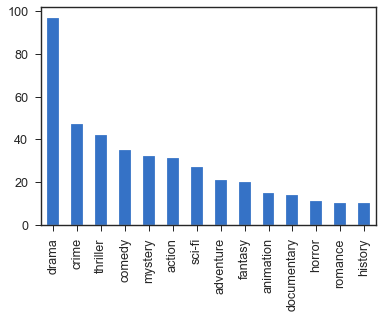

In [103]:
# quick look at most common genres
sns.set_style("ticks")
genres_contemp.sum().sort_values(ascending=False).plot.bar()

In [48]:
# Set up some variables to show the average ratings and popularity by genre
# Do this by multiplying the ratings and # of ratings by the dummy values in the genre columns
genres_contemp_imdb_rating = genres_contemp.apply(lambda x: x*df_contemp['imdb_rating'])
genres_contemp_rt_rating = genres_contemp.apply(lambda x: x*df_contemp['rt_critic_rating'])
genres_contemp_popularity = genres_contemp.apply(lambda x: x*df_contemp['num_imdb_ratings'])

In [49]:
# Capture the average of each parameter per genre
genre_imdb_avg = genres_contemp_imdb_rating.sum()/genres_contemp.sum()
genre_rt_avg = genres_contemp_rt_rating.sum()/genres_contemp.sum()
genre_pop_avg = genres_contemp_popularity.sum()/genres_contemp.sum()

In [95]:
df_avg_compare = pd.concat([genre_rt_avg, genre_imdb_avg, genre_pop_avg], axis=1)
df_avg_compare.head()

,0,1,2
action,87.096774,8.348387,118855.354839
adventure,86.904762,8.385714,135932.523810
animation,95.200000,8.680000,72380.466667
comedy,92.200000,8.522857,72374.714286
crime,88.829787,8.331915,133846.872340


In [96]:
df_avg_compare.columns = ['rt_avg', 'imdb_avg', 'pop_avg']

In [98]:
df_avg_compare = df_avg_compare.sort_values('pop_avg')

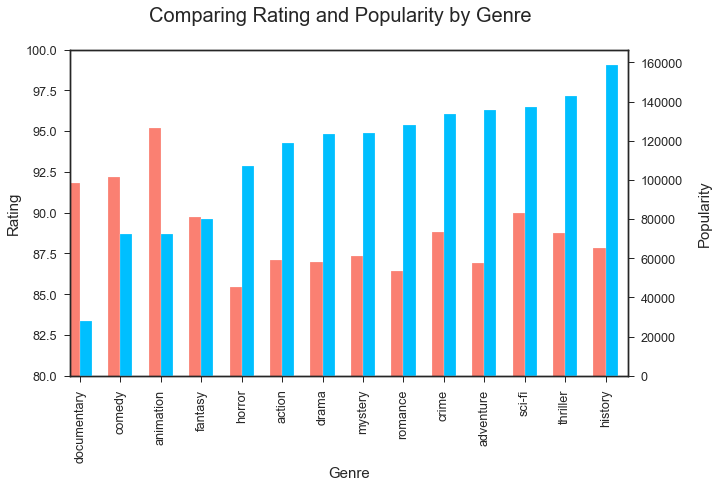

In [101]:
# Take a look at the relationship between popularity and ratings
sns.set_style("ticks")
fig = plt.figure(figsize=(10,6))
plt.suptitle('Comparing Rating and Popularity by Genre', fontsize = 20)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

df_avg_compare.rt_avg.plot(kind='bar', color='salmon', ax=ax, width=0.3, position=1)
df_avg_compare.pop_avg.plot(kind='bar', color='deepskyblue', ax=ax2, width=0.3 position=0)

ax.set_xlabel('Genre', fontsize=15)
ax.set_ylim(80,100)
ax.set_ylabel('Rating', fontsize=15)
ax2.set_ylabel('Popularity', fontsize=15, labelpad=15.0)
plt.show()

In [51]:
# Correlation = -0.4877942302531624
genre_pop_avg.corr(genre_imdb_avg)

-0.4877942302531624

In [52]:
# Correlation = -0.6446794882910207
genre_pop_avg.corr(genre_rt_avg)

-0.6446794882910207

Since we're trying to find what programming will generate revenue and excitement,success of a show should be measured by the popularity or number of ratings.

In [54]:
# Hmm, some network values need cleaning up.
df_contemp['network'].value_counts()

Netflix                                                 34
HBO                                                     13
NBC                                                      8
FX                                                       7
Hulu                                                     6
CW                                                       5
Cartoon Network                                          4
Amazon Prime Video                                       4
Amazon                                                   3
Starz                                                    3
ABC                                                      3
PBS                                                      3
USA                                                      3
Crunchyroll                                              2
CBS                                                      2
Showtime                                                 2
BBC America                                             

In [55]:
# Clean up with np.select! 
conditions = [
    (df_contemp['network'].str.find('BBC') >= 0),
    (df_contemp['network'].str.find('Amazon') >= 0),
    (df_contemp['network'].str.find('Hulu') >= 0),
    (df_contemp['network'].str.find('NBC') >= 0),
    (df_contemp['network'].str.find('Acorn') >= 0),
    (df_contemp['network'].str.find('Cartoon Network') >= 0),
    (df_contemp['network'].str.find('Netflix') >= 0),
    (df_contemp['network'].str.find('Disney') >= 0)
]

choices = [
    'BBC',
    'Amazon',
    'Hulu',
    'NBC',
    'Acorn',
    'Cartoon Network',
    'Netflix',
    'Disney'
]

df_contemp['network'] = np.select(conditions, choices, default=df_contemp['network'])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [56]:
# Take a peek
df_contemp['network'].value_counts()

Netflix            35
HBO                13
NBC                 9
Amazon              8
Hulu                7
FX                  7
BBC                 6
Cartoon Network     6
CW                  5
ABC                 3
PBS                 3
USA                 3
Starz               3
Crunchyroll         2
Acorn               2
Showtime            2
CBS                 2
Disney              2
Channel 5           1
Aniplex             1
SVT                 1
History             1
Comedy Central      1
Science             1
ZDF                 1
Cinemax             1
Apple TV+           1
TruTV               1
POP                 1
SyFy                1
YouTube Premium     1
AT-X                1
AMC                 1
louisck.net         1
WEB TV US           1
NGC                 1
Name: network, dtype: int64

In [61]:
# Let's focus on networks with 5 or more popular shows
top_networks = ['Netflix', 'HBO', 'NBC', 'Amazon', 'Hulu', 'FX', 'BBC', 'Cartoon Network', 'CW']
top_networks_contemp = df_contemp[df_contemp['network'].isin(top_networks)]

In [66]:
# Add up the number of IMDB ratings per network, as well as the number of shows per network
pop_per_network = top_networks_contemp.groupby('network')['num_imdb_ratings'].sum()
shows_per_network = top_networks_contemp['network'].value_counts()

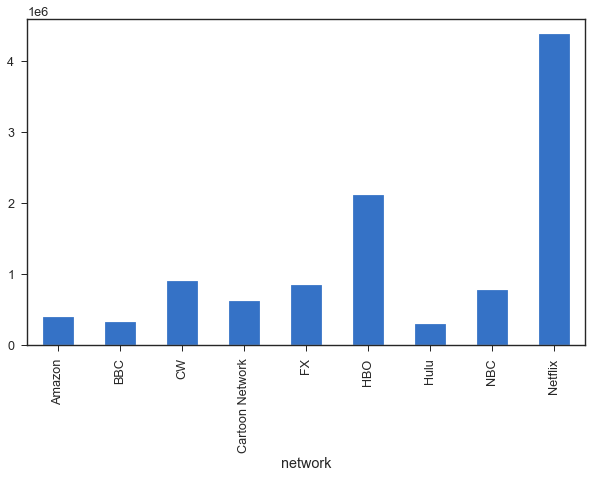

In [104]:
sns.set_style("ticks")
pop_per_network.plot.bar(figsize=(10,6))

In [64]:
# Divide number of ratings by number of shows to get an average
network_pop_avg = ratings_per_network/shows_per_network
network_pop_avg

Amazon              49572.500000
BBC                 52983.500000
CW                 180467.800000
Cartoon Network    102299.000000
FX                 121341.142857
HBO                162752.384615
Hulu                42499.714286
NBC                 86102.555556
Netflix            125023.228571
dtype: float64

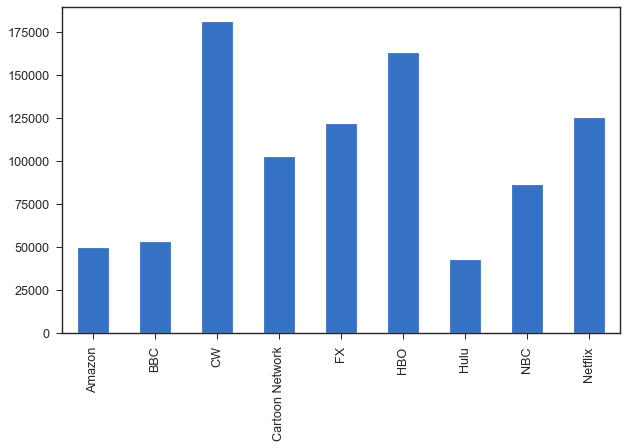

In [105]:
# Plot out an average
sns.set_style("ticks")
network_pop_avg.plot.bar(figsize=(10,6))

In [ ]:
# Painstaking research regarding the originality of each programming
# (0 = based on source material [including documentaries, spin-offs, etc.]
#  1 = not based on source material)
df_contemp['original'] = [
 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
 1, 0, 1, 1, 0, 1 ]

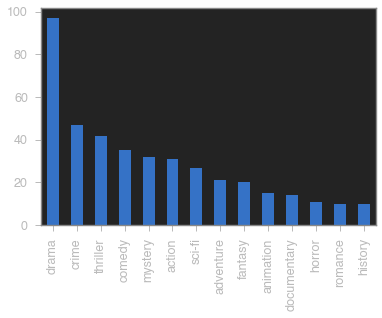

In [70]:
genres_contemp.sum().sort_values(ascending=False).plot.bar()

In [173]:
genres_weight_imdb = genres.apply(lambda x: x*df['imdb_rating'])
genres_weight_rt = genres.apply(lambda x: x*df['rt_critic_rating'])

In [186]:
genres_weight_imdb.sum()/genres.sum()

action         8.461111
adventure      8.507692
animation      8.643243
biography      8.600000
comedy         8.551282
crime          8.393846
documentary    8.831250
drama          8.402069
family         8.688889
fantasy        8.448571
game-show      8.550000
history        8.726667
horror         8.300000
music          8.575000
musical        8.200000
mystery        8.319231
news           8.900000
reality-tv     8.500000
romance        8.400000
sci-fi         8.465217
short          8.500000
sport          8.350000
talk-show      8.675000
thriller       8.415942
war            8.755556
western        8.600000
dtype: float64

In [176]:
genres_weight_rt.sum()/genres.sum()

action          88.814815
adventure       89.230769
animation       93.702703
biography       85.375000
comedy          91.987179
crime           88.630769
documentary     90.625000
drama           87.951724
family          94.888889
fantasy         91.000000
game-show      100.000000
history         88.666667
horror          87.466667
music           96.750000
musical         84.000000
mystery         87.961538
news            98.000000
reality-tv      93.500000
romance         86.789474
sci-fi          90.304348
short           77.000000
sport           91.500000
talk-show       81.500000
thriller        88.594203
war             93.222222
western         93.500000
dtype: float64

In [154]:
df[df['release_year'] >= 2010]

Index(['action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'game-show', 'history',
       'horror', 'music', 'musical', 'mystery', 'news', 'reality-tv',
       'romance', 'sci-fi', 'short', 'sport', 'talk-show', 'thriller', 'war',
       'western'],
      dtype='object')

(array([ 3.,  2.,  3.,  5.,  3.,  3.,  8.,  5.,  3.,  5., 10., 35., 18.,
        22.,  4.,  1.,  1.,  1.,  2.,  2.]),
 array([7.2  , 7.315, 7.43 , 7.545, 7.66 , 7.775, 7.89 , 8.005, 8.12 ,
        8.235, 8.35 , 8.465, 8.58 , 8.695, 8.81 , 8.925, 9.04 , 9.155,
        9.27 , 9.385, 9.5  ]),
 <a list of 20 Patch objects>)

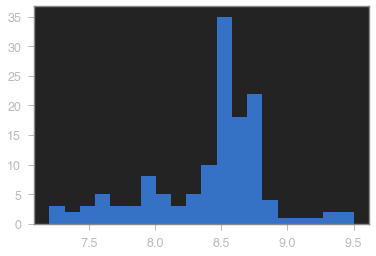

In [217]:
plt.hist(df[df['release_year'] >= 2010]['imdb_rating'], bins=20)

In [219]:
df[df['release_year'] >= 2010]['imdb_rating']

98     9.5
64     9.4
101    9.3
102    9.3
36     9.2
      ... 
88     7.4
60     7.4
48     7.3
44     7.2
80     7.2
Name: imdb_rating, Length: 136, dtype: float64

In [216]:
df[df['release_year'] >= 2010]['rt_critic_rating']

98     100
64      96
101     97
102     93
36      95
      ... 
88      83
60      66
48      72
44      59
80      57
Name: rt_critic_rating, Length: 136, dtype: int64

(array([ 4.,  1.,  1.,  0.,  3.,  2.,  2.,  1.,  2.,  4.,  2.,  6.,  5.,
        12., 10.,  8., 24., 15., 17., 17.]),
 array([ 57.  ,  59.15,  61.3 ,  63.45,  65.6 ,  67.75,  69.9 ,  72.05,
         74.2 ,  76.35,  78.5 ,  80.65,  82.8 ,  84.95,  87.1 ,  89.25,
         91.4 ,  93.55,  95.7 ,  97.85, 100.  ]),
 <a list of 20 Patch objects>)

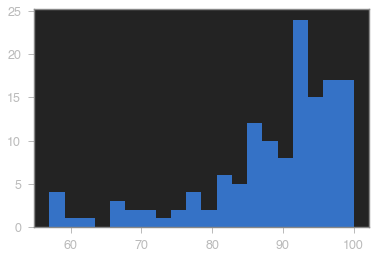

In [218]:
plt.hist(df[df['release_year'] >= 2010]['rt_critic_rating'], bins=20)

In [228]:
df1 = df[df['runtime_mins'] <= 43]
df2 = df[df['runtime_mins'] > 43]

In [229]:
df1['imdb_rating'].describe()

count    118.000000
mean       8.488136
std        0.407865
min        7.200000
25%        8.400000
50%        8.500000
75%        8.700000
max        9.500000
Name: imdb_rating, dtype: float64

In [230]:
df2['imdb_rating'].describe()

count    113.000000
mean       8.475221
std        0.396982
min        7.200000
25%        8.400000
50%        8.500000
75%        8.700000
max        9.400000
Name: imdb_rating, dtype: float64

In [231]:
df1['rt_critic_rating'].describe()

count    118.000000
mean      91.762712
std        8.497036
min       57.000000
25%       88.000000
50%       93.000000
75%      100.000000
max      100.000000
Name: rt_critic_rating, dtype: float64

In [232]:
df2['rt_critic_rating'].describe()

count    113.000000
mean      86.867257
std       10.043214
min       59.000000
25%       82.000000
50%       89.000000
75%       94.000000
max      100.000000
Name: rt_critic_rating, dtype: float64

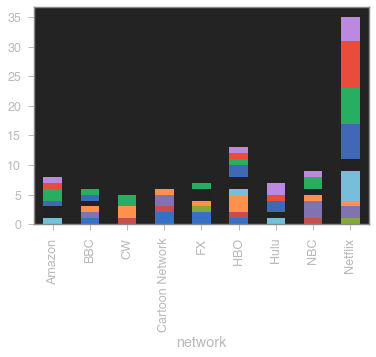

In [71]:
top_networks_contemp.groupby(['network','release_year'])['title'].count().unstack().plot(kind='bar', stacked=True, legend=False)

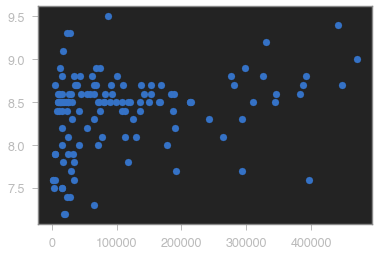

In [75]:
plt.scatter(df_contemp['num_imdb_ratings'], df_contemp['imdb_rating'])

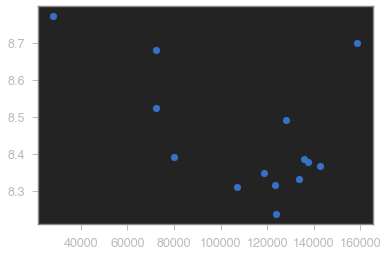

In [77]:
plt.scatter(genre_pop_avg, genre_imdb_avg)